# **Step 4: Exploratory Data Analysis**


In this step, I will perform the task of exploratory data analysis.
I will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab I will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


I Import the pandas module.


In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

I load the dataset into a dataframe.


In [103]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


I plot the distribution curve for the column `ConvertedComp`.


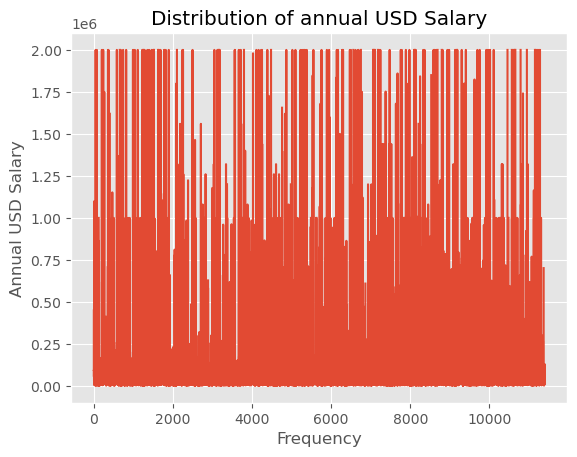

In [104]:
df["ConvertedComp"].plot(kind="line")

plt.title("Distribution of annual USD Salary")
plt.ylabel("Annual USD Salary")
plt.xlabel("Frequency")
plt.show()

Plot the histogram for the column `ConvertedComp`.


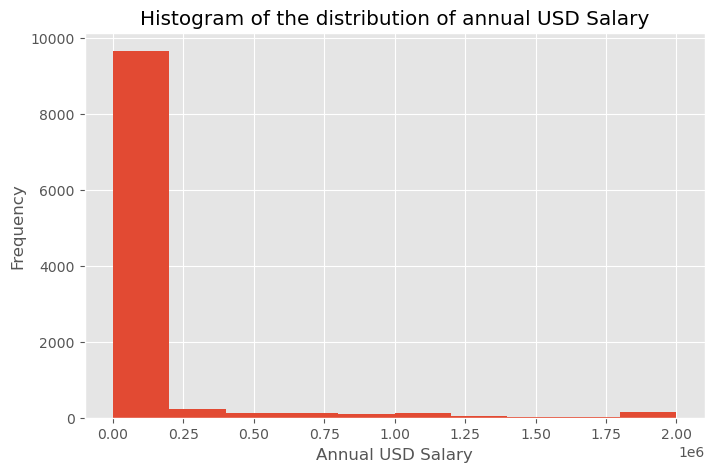

In [105]:
df["ConvertedComp"].plot(kind="hist", figsize = (8, 5))

plt.title("Histogram of the distribution of annual USD Salary")
plt.ylabel("Frequency")
plt.xlabel("Annual USD Salary")
plt.show()

I print the median of the column `ConvertedComp`.


In [106]:
print("median:",df["ConvertedComp"].median())

median: 57745.0


I find out how many responders identified themselves only as a **Man**.

In [107]:
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

I find out the median ConvertedComp of responders identified themselves only as a **Woman**.

In [108]:
print("median of ConvertedComp of responders identified themselves only as a Woman:", df.loc[df["Gender"] == "Woman", "ConvertedComp"].median())
print("median of Age:",df["Age"].median())

median of ConvertedComp of responders identified themselves only as a Woman: 57708.0
median of Age: 29.0


I give the five number summary for the column `Age`?


In [109]:
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

I plot a histogram of the column `Age`.


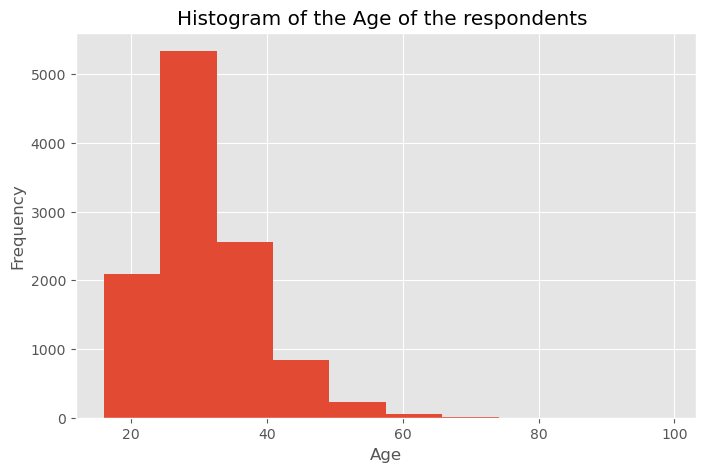

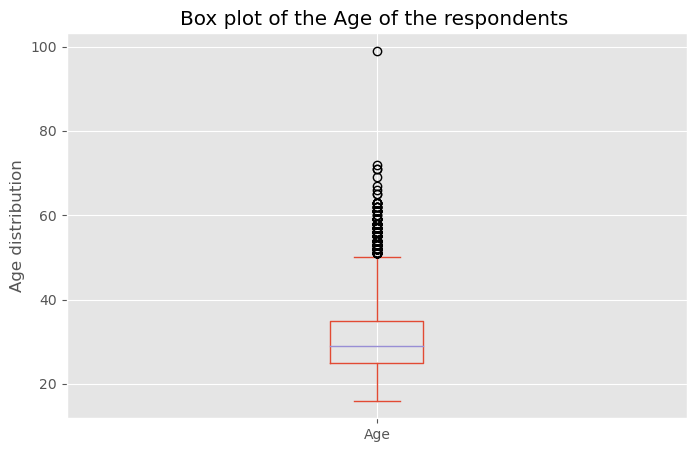

In [110]:
df['Age'].plot(kind ='hist', figsize = (8, 5))

plt.title("Histogram of the Age of the respondents ")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

df['Age'].plot(kind ='box', figsize = (8, 5))

plt.title("Box plot of the Age of the respondents ")
plt.ylabel("Age distribution")
plt.show()

## Outliers


### Finding outliers


I find out if outliers exist in the column `ConvertedComp` using a box plot.

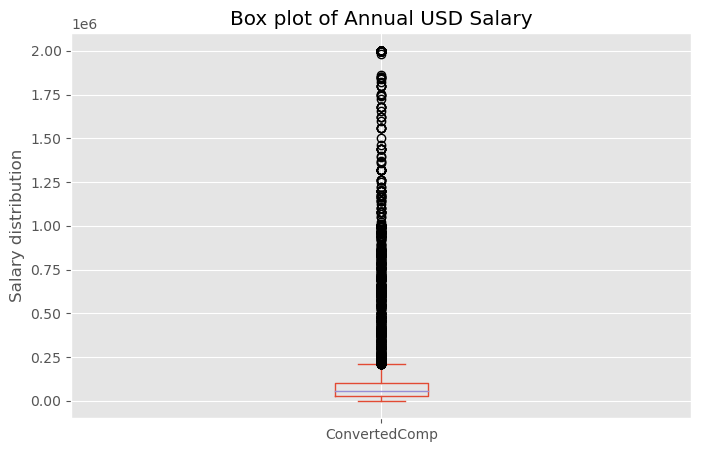

In [111]:
df["ConvertedComp"].plot(kind="box", figsize =(8,5))

plt.title("Box plot of Annual USD Salary")
plt.ylabel("Salary distribution")
plt.show()

I find out the Inter Quartile Range for the column `ConvertedComp`.


In [112]:
Q1 = df["ConvertedComp"].describe()['25%']
Q3 = df["ConvertedComp"].describe()['75%']
IQR = Q3 - Q1
print("Inter Quartile Range =",IQR)

Inter Quartile Range = 73132.0


I find out the upper and lower bounds.


In [113]:
IQR_gap = 1.5 * IQR
upper = Q3 + IQR_gap
lower = Q1 - IQR_gap
if lower < 0:
    lower = 0
print("Lower bound =",lower)
print("Upper bound =",upper)

Lower bound = 0
Upper bound = 209698.0


I identify how many outliers are there in the `ConvertedComp` column.


In [114]:
df[(df["ConvertedComp"] > upper) | (df["ConvertedComp"] < lower)].shape[0]

879

I create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [115]:
new_df = df[(df["ConvertedComp"] <= upper) & (df["ConvertedComp"] >= lower)]
print("median:",new_df["ConvertedComp"].median())
print("mean:", new_df["ConvertedComp"].mean())

median: 52704.0
mean: 59883.20838915799


## Correlation


### Finding correlation


I find the correlation between `Age` and all other numerical columns.


In [64]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Next step: Data visualization
